In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col = 0 )

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Quickly check to see the size of our DF, both rows and columns
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


In [4]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
# your code here
#lhow many missing values are there

df.isnull().sum()

_STATE          0
FMONTH          0
IDATE           0
IMONTH          0
IDAY            0
            ...  
_RFSEAT2        0
_RFSEAT3        0
_FLSHOT6    22334
_PNEUMO2    22334
_AIDTST3     3773
Length: 358, dtype: int64

Now check to see how large our subset df.

In [6]:
# your code here

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [7]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [8]:
#your code here
#create a list of columns that don't have any values


list_of_dropped_columns = []
for col in df.columns:
    if df[col].isna().sum() == len(df):
        list_of_dropped_columns.append(col)
    
    

In [9]:
clean_df = df.drop(columns=list_of_dropped_columns)

In [10]:
#looking at sick days, hiw many people fall into each category of number of sick days
clean_df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [11]:
#drop patients who refused to answer and we're not sure 
drop_list = []

for i in clean_df['PHYSHLTH']:
    if i == 99 or i == 77:
        drop_list.append(i)
drop_list

[77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 99.0,
 99.0,
 99.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 99.0,
 99.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 99.0,
 99.0,
 99.0,
 99.0,
 77.0,
 77.0,
 99.0,
 99.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,
 99.0,
 77.0,
 77.0,
 77.0,
 77.0,
 77.0,

In [12]:
len(drop_list)

798

In [13]:
#remove thoses from the dataset


clean_df.drop(clean_df[clean_df['PHYSHLTH'] == 77 ].index , inplace=True)

In [14]:

clean_df.drop(clean_df[clean_df['PHYSHLTH'] == 99 ].index , inplace=True)

In [15]:
#look at the shape of the new, cleaned up DF
clean_df['PHYSHLTH'].describe()

count    33747.000000
mean        59.617625
std         37.706577
min          1.000000
25%         14.000000
50%         88.000000
75%         88.000000
max         88.000000
Name: PHYSHLTH, dtype: float64

In [16]:
#change values for 88 to 0 to indicate 0 sick days
clean_df['PHYSHLTH']=clean_df['PHYSHLTH'].apply(lambda x: 0 if x==88 else x)

In [17]:
# #channge value labels for states to make it easier to read
clean_df['_STATE'] = clean_df['_STATE'].map({9.0:'Connecticut',34.0:'New Jersey', 36.0:'New York'})


In [18]:
#rename _STATE column to state
clean_df = clean_df.rename(columns={'_STATE':'state'})

In [19]:
#rename PHYSHLTH column to Num of Sick Days
clean_df = clean_df.rename(columns={'PHYSHLTH':'Num of Sick Days'})

In [20]:
clean_df['state'].value_counts()

New York       11876
New Jersey     11458
Connecticut    10413
Name: state, dtype: int64

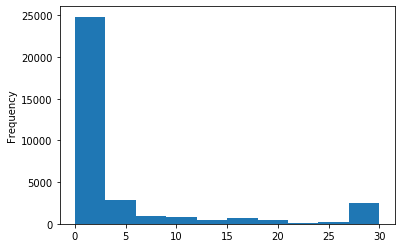

In [21]:
## 2. Generate the descriptive statistics

#Now that our target variable is cleaned up lets calculate the descriptive statistics, 
#generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

clean_df['Num of Sick Days'].plot(kind='hist')

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [22]:
# code to calculate the average number of sick days by state
# code to calculate the average number of sick days by state
#merge state and sick day columns
s1 = pd.DataFrame(clean_df['state']).reset_index().drop(columns='index')
s2 = pd.DataFrame(clean_df['Num of Sick Days']).reset_index().drop(columns='index')
state_phyh = pd.concat([s2, s1], axis=1)

In [23]:
state_phyh = state_phyh.groupby('state')['Num of Sick Days'].mean()

Text(0.5, 0, 'State')

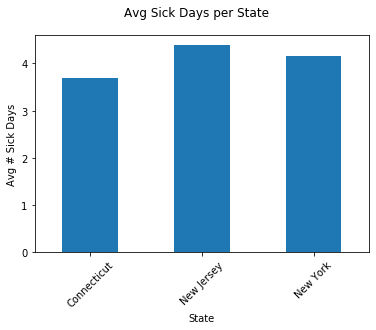

In [24]:
fig,ax = plt.subplots()
plt.suptitle('Avg Sick Days per State')
ax = state_phyh.plot(kind='bar', rot=45)
ax.set_ylabel('Avg # Sick Days')
ax.set_xlabel('State')

Text(0.5, 0, 'State')

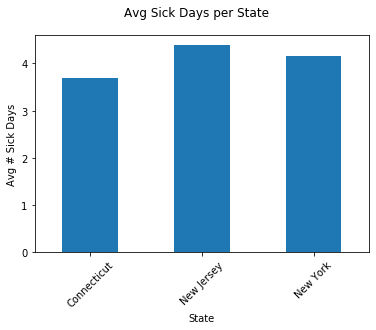

In [25]:
# code to graph those averages using matplotlib

fig,ax = plt.subplots()
plt.suptitle('Avg Sick Days per State')
ax = state_phyh.plot(kind='bar', rot=45)
ax.set_ylabel('Avg # Sick Days')
ax.set_xlabel('State')

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [26]:
clean_df

,state,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,Connecticut,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,Connecticut,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,Connecticut,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,Connecticut,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,Connecticut,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,New York,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,New York,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,New York,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,New York,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


In [27]:
# #rename columns for chronic illnesses
clean_df = clean_df.rename(columns=({'CVDINFR4':'Heart Attack', 'CVDCRHD4':'Heart Disease', 'CVDSTRK3':'Stroke', 'ASTHMA3':'Had Asthma',
                                     'ASTHNOW':'Have Asthma Now',
                                    'CHCSCNCR':'Skin Cancer', 'CHCOCNCR':'Other Cancer', 'CHCCOPD1':'Pulmonary,emphysema,bronchitis',
                                    'HAVARTH3':'Arthritis', 'ADDEPEV2':'Depression', 'CHCKIDNY':'Kidney Disease', 'DIABETE3':'Diabetes'}))

In [28]:
#slice dataframe for chronic illnesses
chronic_df = clean_df.loc[:, 'Heart Attack':'Diabetes']

In [29]:
#change 2.0 values to 0
chronic_df.replace(range(2,10),0, inplace=True)

In [30]:
chronic_df

,Heart Attack,Heart Disease,Stroke,Had Asthma,Have Asthma Now,Skin Cancer,Other Cancer,"Pulmonary,emphysema,bronchitis",Arthritis,Depression,Kidney Disease,Diabetes
49938,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49939,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49940,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49941,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49942,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
303774,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0
303775,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303776,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
303777,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [31]:
#add up all the chronic illnesses for each patient
chronic_df['chronic'] = chronic_df.sum(axis=1)

In [32]:
chronic_df.dropna(inplace=True)

In [33]:
clean_df['chronic_index'] = chronic_df['chronic']

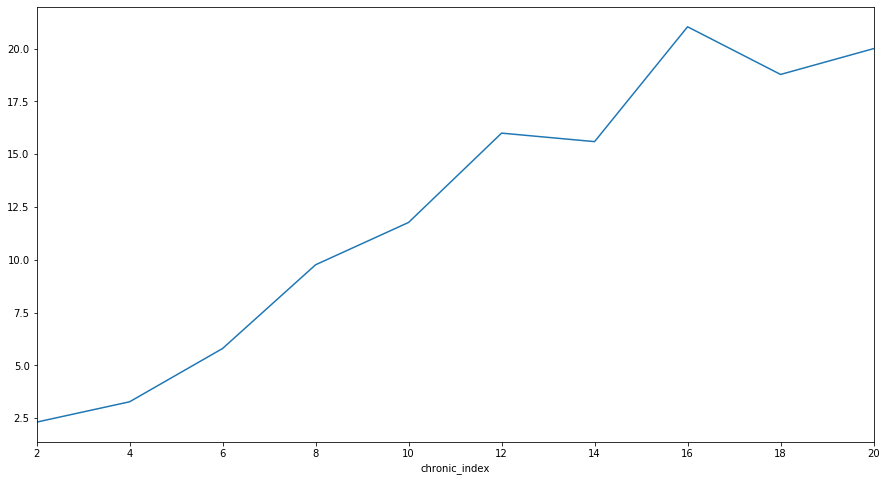

In [98]:
clean_df.groupby('chronic_index')['Num of Sick Days'].mean().plot(kind='line', figsize=(15,8))


## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [34]:
# create new coljumn that labels people as sick or not sick

clean_df['sick'] = clean_df['chronic_index'].apply(lambda x: 1 if x in range(1,21) else x)


In [35]:
clean_df['sick'].value_counts()

1.0    4662
Name: sick, dtype: int64

In [78]:
len(clean_df)

13441

In [37]:
state_series = pd.DataFrame(clean_df['state']).reset_index().drop(columns='index')
sick_series = pd.DataFrame(clean_df['sick']).reset_index().drop(columns='index')
state_sick = pd.concat([state_series, sick_series], axis=1)

In [38]:
state_sick_reset = state_sick.groupby('state')['sick'].sum().reset_index()

In [47]:
state_sick_reset['percentage sick'] = state_sick_reset['sick'].apply(lambda x: x/len(clean_df) * 100)

In [48]:
state_sick_reset

,state,sick,percentage sick
0,Connecticut,1570.0,4.652265
1,New Jersey,1421.0,4.210745
2,New York,1671.0,4.951551


In [40]:
x = state_sick_reset['state']
x = np.array(x)

In [44]:
y = state_sick_reset['percentage sick']
y = np.array(y)

Text(0, 0.5, 'Percentage of Sixck People')

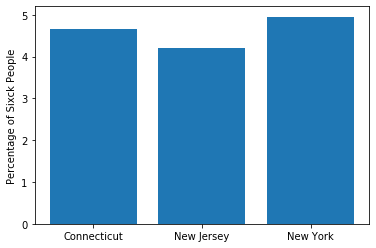

In [49]:
fig , ax = plt.subplots()

ax = plt.bar(x,y)
plt.ylabel('Percentage of Sixck People')

In [35]:
# create graphic to compare chronically sick by state

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [71]:
clean_df['SMOKDAY2'].describe()

count    13441.000000
mean         2.512090
std          0.799008
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: SMOKDAY2, dtype: float64

In [54]:
#drop rows where people we're unsure or refused to answer

clean_df.drop(clean_df.loc[(clean_df['SMOKDAY2']==9.0) | (clean_df['SMOKDAY2']==7.0)].index, inplace=True)

In [55]:
clean_df.dropna(subset=['SMOKDAY2'], inplace=True)

In [75]:
sickday_series1 = pd.DataFrame(clean_df['Num of Sick Days']).reset_index().drop(columns='index')
sickday_series1

,Num of Sick Days
0,0.0
1,0.0
2,28.0
3,0.0
4,0.0
...,...
13436,0.0
13437,10.0
13438,2.0
13439,0.0


In [77]:
sickdays_smokers = pd.concat([sickday_series1, smokeday_series], axis=1)
sickdays_smokers

,Num of Sick Days,SMOKDAY2
0,0.0,3.0
1,0.0,3.0
2,28.0,3.0
3,0.0,3.0
4,0.0,3.0
...,...,...
13436,0.0,3.0
13437,10.0,3.0
13438,2.0,3.0
13439,0.0,1.0


In [ ]:
sickdays_smokers

In [57]:
clean_df

,state,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,chronic_index,sick
49942,Connecticut,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN
49944,Connecticut,1.0,2032017,2,3,2017,1100.0,2017000007,2.017000e+09,1.0,...,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN
49946,Connecticut,1.0,1262017,1,26,2017,1100.0,2017000009,2.017000e+09,1.0,...,1.0,3.0,2.0,1.0,1.0,2.0,1.0,2.0,NaN,NaN
49951,Connecticut,1.0,1302017,1,30,2017,1100.0,2017000014,2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN
49954,Connecticut,1.0,1212017,1,21,2017,1100.0,2017000017,2.017000e+09,1.0,...,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303768,New York,9.0,10062017,10,6,2017,1200.0,2017012239,2.017012e+09,NaN,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
303769,New York,1.0,2282017,2,28,2017,1200.0,2017012240,2.017012e+09,NaN,...,2.0,4.0,2.0,1.0,2.0,NaN,NaN,9.0,NaN,NaN
303773,New York,4.0,4212017,4,21,2017,1200.0,2017012244,2.017012e+09,NaN,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
303774,New York,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN


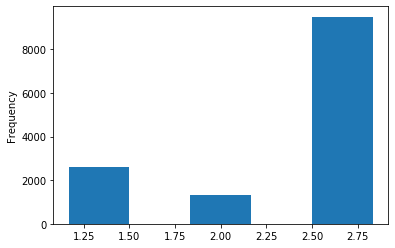

In [58]:
#Generate a histogram for the variable.


clean_df['SMOKDAY2'].plot(kind='hist', bins=3, rwidth=.5)

In [59]:
# Generate graphics that show how the responses to this variable might differ by state.

state_series1 = pd.DataFrame(clean_df['state']).reset_index().drop(columns='index')
smokeday_series = pd.DataFrame(clean_df['SMOKDAY2']).reset_index().drop(columns='index')
smokeday_series = pd.DataFrame(clean_df['SMOKDAY2']).reset_index().drop(columns='index')
heartdisease_series = pd.DataFrame(clean_df['Heart Disease']).reset_index().drop(columns='index')
asthma_series = pd.DataFrame(clean_df['Have Asthma Now']).reset_index().drop(columns='index')

state_smokeday = pd.concat([state_series1, smokeday_series], axis=1)

In [60]:
unstack_state_smokeday = state_smokeday.groupby('state')['SMOKDAY2'].value_counts().unstack()

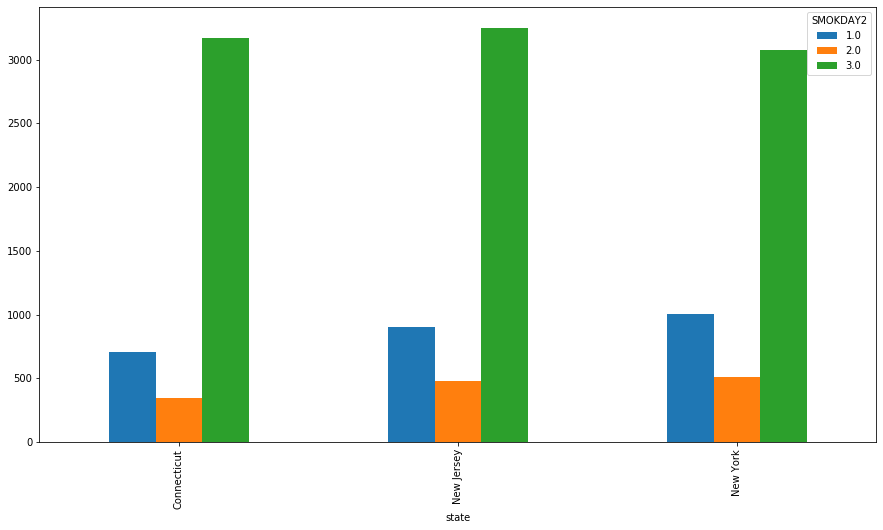

In [61]:
unstack_state_smokeday.plot(kind='bar', figsize=(15,8), )

In [62]:
state_smokeday_sick = pd.concat([state_series1, smokeday_series, sick_series], axis=1)

In [63]:
state_smokeday_sick_reset = state_smokeday_sick.groupby(['state','SMOKDAY2'])['sick'].count().reset_index()

In [64]:
state_smokeday_sick_reset

,state,SMOKDAY2,sick
0,Connecticut,1.0,84
1,Connecticut,2.0,50
2,Connecticut,3.0,418
3,New Jersey,1.0,163
4,New Jersey,2.0,82
5,New Jersey,3.0,528
6,New York,1.0,148
7,New York,2.0,63
8,New York,3.0,418


In [122]:
#compare smoking to heart disease related illnesses



In [66]:
#compare smoking to asthma related illnesses
state_smokeday_asthma = pd.concat([state_series1, asthma_series, sick_series], axis=1)
state_smokeday_asthma.dropna(inplace=True)
state_smokeday_asthma_reset = state_smokeday_asthma.groupby(['state','Have Asthma Now'])['sick'].count().reset_index()

In [67]:
state_smokeday_asthma_reset

,state,Have Asthma Now,sick
0,Connecticut,1.0,73
1,Connecticut,2.0,27
2,Connecticut,7.0,4
3,Connecticut,9.0,1
4,New Jersey,1.0,69
5,New Jersey,2.0,27
6,New Jersey,7.0,2
7,New York,1.0,55
8,New York,2.0,32
9,New York,7.0,4


## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [36]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  